<a href="https://colab.research.google.com/github/BrainsCorp/Data-Science-Stuff/blob/master/twitter_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Twitter Sentimental Analysis

#Setting Tools
###Setting up the environment is the first step.
These are the Libraries to be installed before proceeding any further.
Twitter API is accessed in Python using the library called “Tweepy”


In [ ]:
!pip install advertools
!pip install emoji

In [ ]:
import tweepy                         #Our Tool for Accessing Twitter API
from textblob import TextBlob         #For Text Polarity and Subjectivity
import pandas as pd
import re                             #regex String extraction

from wordcloud import WordCloud       #Generating WordCloud
import matplotlib.pyplot as plt       #For Graphs

import seaborn as sns                 #For Graphs
from google.colab import files
import io

from sklearn.preprocessing import OrdinalEncoder
import advertools as adv
import emoji
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

###Authentication
<ol>
<li>For Getting access to the twitter data, we need to first form a twitter developer account on this <b><a href = "https://www.developer.twitter.com/"> developer.twitter.com </a></b></li>

<li><b>After Sign In/ Sign Up,</b><br>Create a Twitter App/ Project where you will be asked for some general information about you and your project.
After, Click on Generate Tokens and Keys, this is want we get</li>

<li>
<ol>
<li>API Key: XXXXXXXX.. (<i> A key to representing your username/ Consumer Key </i>)</li>
<li>API Secret: XXXXXX.. (<i> representing your password/ Consumer Secret</i> )</li>
<li>Bearer Key: XXXXX... (<i> Pass through Site Access/ Ticket</i> )</li>
</ol>
</li>

After that Generate authenticate (<i>authorization keys and Token</i>)

<li>
<ol>
<li>Access Token: XXXXXX.. (<i> Access to Site Data <i>)</li>
<li>Access Secret: XXXXXX.. (<i> it’s Password Key<i> )</li>
</ol>

</ol>


In [ ]:
#Uploading Files of Keys
abc = files.upload()
Key_file = pd.read_csv(io.BytesIO(abc['Keys.csv']), delimiter=",", names=['Key_Tokens'])
#in sequence: accessToken, accessSecret, consumerKey, consumerSecret, bearerToken

Saving Keys.csv to Keys.csv


In [ ]:
class TwitterClient(object):
  def __init__(self):
    '''file = input("enter the file name containing keys and tokens of twitter dev. acc. with extension(.csv): ")
    upload = pd.read_csv(file)'''

    #initializing Keys and Tokens Got from Twitter Developer Account
    accessToken = Key_file['Key_Tokens'][1]
    accessSecret =  Key_file['Key_Tokens'][2]
    consumerKey = Key_file['Key_Tokens'][3]
    consumerSecret = Key_file['Key_Tokens'][4]
    bearerToken = Key_file['Key_Tokens'][5]
    #Authorizing Tweepy with Keys
    try:
      self.auth = tweepy.OAuthHandler(consumerKey, consumerSecret)  #API key and API Token to authenicate user
                                                                    #on whose behalf data will access.
      self.auth.set_access_token(accessToken, accessSecret)         #Setting Access to Site
      self.apis = tweepy.API(self.auth, wait_on_rate_limit=True)    #Generating Pathway for Getting Data
    except:
      print("Authentication Error")


  #Cleaning Text: removing "#, @, !, ... special chars"
  #Using regular expression match finder
  #re.sub -> removes that combination of matching substring from original text

  def cleanText(self, text):
    text = self.emojiText(text)
    #For Text Handling
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https://[A-Za-z0-9!-?]+', '', text)
    return text

  def emojiText(self, text):
    #For Emoji Handling
    text = emoji.demojize(text)
    text = text.replace(":","")
    return text

  def extractEmojis(self, text):
    return adv.extract_emoji(text)['emoji_flat']

  def extractHashtags(self, text):
    return adv.extract_hashtags(text)['hashtags']

  def extractMentions(self, text):
    return adv.extract_mentions(text)['mentions']

  #Text Subjectiviy Check
  def getSubjetivity(self, text):
    return TextBlob(text).sentiment.subjectivity #Range 0 to 1

  #Text Polarity Check
  def getPolarity(self, text):
    return TextBlob(text).sentiment.polarity #Range -1 to 1

  #Getting Analysis
  def getAnalysis(self, score):
    if score < -0.5:
        return "Strong Negative"
    elif score < 0:
        return "Weak Negative"
    elif score == 0:
        return "Neutral"
    elif score < 0.5:
        return "Weak Positive"
    else:
        return "Strong Positive"

  def getTweets(self, topic, amount):
    #screen_name: attribute searches for specified name
    #q = Query to search in tweets
    #tweet_mode = 'extended' specifies the full tweet
    #lang = specifies language

    posts = self.apis.search(q=topic, screen_name=topic, lang="en", count=amount, tweet_mode="extended")
    return posts


##Data Generation


<ol><label><h3>Calling Twitter API.</h3></label>
<li>Entering Topic and Number of Tweets (n)</li>
<li>Creating Our TwitterClient() object<br>Calling getTweets fnc</li>
<li>The API fetching results from site using authenticated keys and tokens</li>
</ol>

In [ ]:
# Calling TwitterClient
api = TwitterClient()
topic = input("enter the topic: ")
posts = api.getTweets(topic, 200)

In [ ]:

# Creating DataFrame
df = pd.DataFrame({"Tweets":[tweet.full_text for tweet in posts],
                   "PostedOn":[tweet.created_at for tweet in posts]}, columns=['Tweets','PostedOn'])


In [ ]:
df.head()

,Tweets,PostedOn
0,RT @FT: Donald Trump expected to announce Whit...,2022-11-04 16:46:02
1,RT @RedWingGrips: Hillary Clinton rigged the e...,2022-11-04 16:46:02
2,@m_clarkson78 @mmpadellan Sometimes I think it...,2022-11-04 16:46:01
3,RT @OccupyDemocrats: Prevention is key. https:...,2022-11-04 16:46:01
4,RT @lavern_spicer: Word on the street is that ...,2022-11-04 16:46:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tweets    100 non-null    object        
 1   PostedOn  100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ KB


# Data Manipulation

###Text Cleaning
Using Regex ( Regular Expression ) for finding all possible combinations from given letters and then removing them if match is found.<br>
<b>CleanText( ) #User Generated fnc</b>

In [ ]:
# Cleaning Tweet Text
df['Emojis'] = df['Tweets'].apply(api.extractEmojis)
df['Mentions'] = df['Tweets'].apply(api.extractMentions)
df['Hastags'] = df['Tweets'].apply(api.extractHashtags)
df['Tweets'] = df['Tweets'].apply(api.cleanText)

In [ ]:
df.head()

,Tweets,PostedOn,Emojis,Mentions,Hastags
0,Donald Trump expected to announce White House ...,2022-11-04 16:46:02,[],[[@ft]],[[]]
1,Hillary Clinton rigged the entire 2016 preside...,2022-11-04 16:46:02,[],[[@redwinggrips]],[[]]
2,_clarkson78 Sometimes I think it would cause ...,2022-11-04 16:46:01,[],"[[@m_clarkson78, @mmpadellan]]",[[]]
3,Prevention is key. https//t.co/AtutxbFoCf,2022-11-04 16:46:01,[],[[@occupydemocrats]],[[]]
4,_spicer Word on the street is that Donald Trum...,2022-11-04 16:46:00,[],[[@lavern_spicer]],[[]]


### Sentiment -> knowing hows one's views/opinion about a topic
* <b>Subjectivity:</b> how much ones's statement is based on his/her personal opinions, feelings, emotions rather than Facts (or Objective)
* <b>Polarity:</b> Negative or Positive sense of something (in this, it means text )

In [ ]:
# Applying Polarity Check and Analysis
df['Subjectivity'] = df['Tweets'].apply(api.getSubjetivity)
df['Polarity'] = df['Tweets'].apply(api.getPolarity)
df['Analysis'] = df['Polarity'].apply(api.getAnalysis)
df['TweetLen'] = df['Tweets'].apply(lambda x: len(x))
print("Shape of DataFrame: ",df.shape, end="\n")
print(df.head(), '\n')

Shape of DataFrame:  (100, 9)
                                              Tweets            PostedOn  \
0  Donald Trump expected to announce White House ... 2022-11-04 16:46:02   
1  Hillary Clinton rigged the entire 2016 preside... 2022-11-04 16:46:02   
2  _clarkson78  Sometimes I think it would cause ... 2022-11-04 16:46:01   
3          Prevention is key. https//t.co/AtutxbFoCf 2022-11-04 16:46:01   
4  _spicer Word on the street is that Donald Trum... 2022-11-04 16:46:00   

  Emojis                        Mentions Hastags  Subjectivity  Polarity  \
0     []                         [[@ft]]    [[]]      0.200000 -0.050000   
1     []               [[@redwinggrips]]    [[]]      0.562500  0.208333   
2     []  [[@m_clarkson78, @mmpadellan]]    [[]]      0.571429  0.250000   
3     []            [[@occupydemocrats]]    [[]]      1.000000  0.000000   
4     []              [[@lavern_spicer]]    [[]]      0.288889 -0.194444   

        Analysis  TweetLen  
0  Weak Negative        87 

###Getting Username of People who reTweets

In [ ]:
df.Tweets.apply(lambda x: re.findall(r'@([^\s@]+)', x))

0     []
1     []
2     []
3     []
4     []
      ..
95    []
96    []
97    []
98    []
99    []
Name: Tweets, Length: 100, dtype: object

### Percentage of +ve and -ve Tweets

In [ ]:
pTweets = df[df.Analysis == "Strong Positive"]
#pTweets = pTweets['Tweets']
pPercent = round((pTweets.shape[0] / df.shape[0]) * 100, 1)
print("percentage of positive tweets : ",pPercent, end="\n")

wpTweets = df[df.Analysis == "Weak Positive"]
#pTweets = pTweets['Tweets']
wpPercent = round((wpTweets.shape[0] / df.shape[0]) * 100, 1)
print("percentage of Weak positive tweets : ",wpPercent, end="\n")

nTweets = df[df.Analysis == "Strong Negative"]
#nTweets = nTweets['Tweets']
nPercent = round((nTweets.shape[0] / df.shape[0]) * 100, 1)
print("percentage of Strong Negative tweets : ",nPercent, end="\n")

wnTweets = df[df.Analysis == "Weak Negative"]
#nTweets = nTweets['Tweets']
wnPercent = round((wnTweets.shape[0] / df.shape[0]) * 100, 1)
print("percentage of Weak Negative tweets : ",wnPercent, end="\n")

ntTweets = df[df.Analysis == "Neutral"]
ntPercent = round((ntTweets.shape[0] / df.shape[0]) * 100, 1)
print("percentage of Neutral tweets : ",ntPercent, end="\n")

percentages = {"Strong Positive":pPercent, "Weak Positive":wpPercent,"Neutral":ntPercent, "Weak Negative":wnPercent, "Strong Negative":nPercent}

percentage of positive tweets :  4.0
percentage of Weak positive tweets :  33.0
percentage of Strong Negative tweets :  4.0
percentage of Weak Negative tweets :  20.0
percentage of Neutral tweets :  39.0


In [ ]:
' '.join([twts for twts in df['Tweets'][0:10]])

'Donald Trump expected to announce White House bid after midterms https//t.co/SaeSyzDhEE Hillary Clinton rigged the entire 2016 presidential election against Donald Trump and all she got was a campaign fine. _clarkson78  Sometimes I think it would cause you people physical pain to not bring up Donald Trump when trying to defend your favorite people Prevention is key. https//t.co/AtutxbFoCf _spicer Word on the street is that Donald Trump is announcing his 2024 bid on November 14, 2022!\n\nIT’S ABOUT TO GO DOWN! I am outraged at the mere thought of donald trump being able to run for president again &amp; I\'m not sure my stomach will… Tom Barrack, a longtime ally of former President Donald Trump, has been acquitted of foreign lobbying charges https//t.co/Z4qh… BREAKING Superstar New York AG Letitia James announces a "major victory" against Donald Trump as a judge rules in her… BREAKING Sources tell Newsmax that former President Donald Trump is planning to announce a 2024 Presidential bid

# Data Visualization

### Using Matplotlib.pyplot Library And Seaborn for visualizing data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

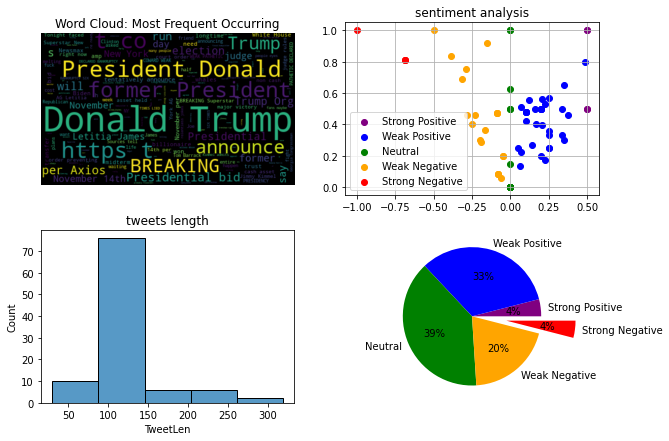

In [ ]:
# Graphs and Visuals
allWords = ' '.join([twts for twts in df['Tweets']]) #joining all words
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

# WordCloud Graph
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,7))
ax1.imshow(wordCloud, interpolation="bilinear")
ax1.title.set_text('Word Cloud: Most Frequent Occurring')
ax1.axis('off')

# Sentiment Graph
catg_tweets = [pTweets,wpTweets, ntTweets, wnTweets, nTweets]
color_scheme = ["Purple","blue","green","orange","red"]
label = ["Strong Positive","Weak Positive","Neutral","Weak Negative","Strong Negative"]

for catg, clr, lbl in zip(catg_tweets, color_scheme, label):
  if(not(catg.shape[0] == 0)):
    ax2.scatter(catg.Polarity, catg.Subjectivity, color=clr, label = lbl)

ax2.title.set_text('sentiment analysis')
ax2.legend(loc='best')
ax2.grid()

sns.histplot(data=df.TweetLen, bins = 5, ax=ax3)
ax3.title.set_text('tweets length')

ax4.pie(x=list(percentages.values()), labels=percentages.keys(), colors=color_scheme, autopct='%.0f%%', explode=[0, 0, 0, 0, 0.5])
plt.savefig("{}.png".format(topic))
files.download("{}.png".format(topic))
plt.show()

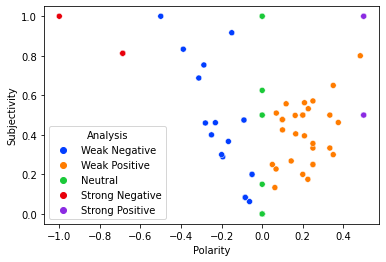

In [ ]:
#An Alternate, Simplified through Seaborn Library
sns.scatterplot(data=df, x=df.Polarity, y=df.Subjectivity, hue=df.Analysis, palette = 'bright')

# Analysis

### Key Findings from these Visualizations
<ol>
<li><h3>Relationship b/w Attributes</h3>Correlation can help in finding some insights, if a relationship exists b/w two or not.</li>
<li><h3>Getting Buzz Words</h3>
Hot words help in understanding key topic which may be used by advertisers to promote well and effectively</li>


### Mapping Done to Convert Object Values to Numerical Ones
df[ 'Analysis' ] : object type <br>
so as to find better correlation b/w features

In [ ]:
ordinal_encoder = OrdinalEncoder()
encoding = ordinal_encoder.fit_transform(df[['Analysis']])
print("Categories:",ordinal_encoder.categories_)
print(pd.DataFrame([x[0] for x in encoding]).value_counts())

Categories: [array(['Neutral', 'Strong Negative', 'Strong Positive', 'Weak Negative',
       'Weak Positive'], dtype=object)]
0.0    39
4.0    33
3.0    20
1.0     4
2.0     4
dtype: int64


In [ ]:
df['Analysis'] = encoding

### Visualizing Correlations

In [ ]:
correlation = df[['Polarity','Subjectivity','TweetLen','Analysis']].corr(method="pearson")
correlation

,Polarity,Subjectivity,TweetLen,Analysis
Polarity,1.000000,-0.123331,0.195907,0.292793
Subjectivity,-0.123331,1.000000,0.124133,0.441561
TweetLen,0.195907,0.124133,1.000000,0.310843
Analysis,0.292793,0.441561,0.310843,1.000000


Darker Squares representing -ve correlation => inverse relationship<br>
Brighter Squares representing +ve correlation => direct relationship<br>
Mid/ Neutral Color => No relationship

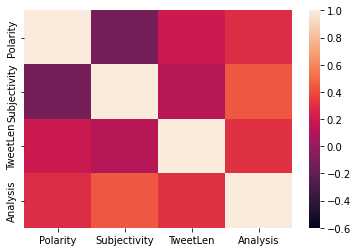

In [ ]:
sns.heatmap(correlation, vmin=-0.6, vmax=1)

### A PairPlot Graphing Relationship Bw Different Attributes
The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

[array(['Neutral', 'Strong Negative', 'Strong Positive', 'Weak Negative',
       'Weak Positive'], dtype=object)]
0.0    39
4.0    33
3.0    20
1.0     4
2.0     4
dtype: int64


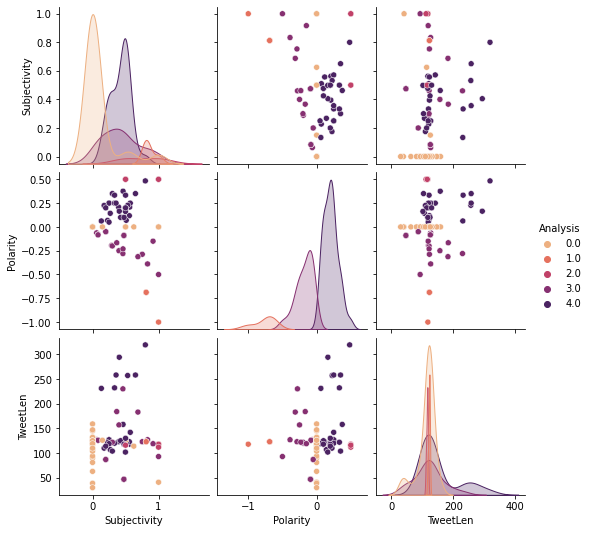

In [ ]:
sns.pairplot(data=df, kind="scatter", hue="Analysis", palette='flare')
print(ordinal_encoder.categories_)
print(pd.DataFrame([x[0] for x in encoding]).value_counts())

In [ ]:
df[['Polarity','Subjectivity','TweetLen','Analysis']].cov()

,Polarity,Subjectivity,TweetLen,Analysis
Polarity,0.060940,-0.009426,2.287721,0.128280
Subjectivity,-0.009426,0.095853,1.817987,0.242628
TweetLen,2.287721,1.817987,2237.704545,26.096970
Analysis,0.128280,0.242628,26.096970,3.149899


#Conclusion

###Findings
Through Out the Analysis, it came to notice that their exists no or minimal relationship between defined attributes ['Polarity', 'Subjectivity', 'Tweets Length'] but also it came into light that Length of the Tweets increases with the Opinion or the view become more Subjective.<br>

Futher, noticed that for some searches the analysis did't perform well, the polarity and subjectivity check fails to find hidden sense/true meaning.<br>
example: Below



In [ ]:
polr = api.getPolarity("Taliban Government ban girl education for their own sake. #HateTaliban")
print(api.getAnalysis(polr))
print(polr)

Strong Positive
0.6


Also, Notice that the analysis neglect Emoji's ( Symbol Notation to represent emotions ) which can be most useful in understanding text emotions. 😀 😠 🔥 💖

Example

In [ ]:
print(emoji.emojize(":face_with_tears_of_joy:"))
print("Polarity: ",api.getPolarity(emoji.emojize(":face_with_tears_of_joy:")))

😂
Polarity:  0.0


In [ ]:
emojis = adv.extract_emoji(df['Tweets'])
print(emojis.keys())

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])


['🆘', '🆘', '🇺🇦', '🆘', '🆘', '🤩', '😝', '😂', '😂', '🇺🇦']

In [ ]:
print(emojis['top_emoji'])
print(emojis['top_emoji_sub_groups'])
print(emojis['top_emoji_text'])

[('🆘', 4), ('🇺🇦', 2), ('😂', 2), ('🤩', 1), ('😝', 1)]
[('alphanum', 4), ('country-flag', 2), ('face-smiling', 2), ('face-affection', 1), ('face-tongue', 1)]
[('SOS button', 4), ('flag: Ukraine', 2), ('face with tears of joy', 2), ('star-struck', 1), ('squinting face with tongue', 1)]


<ol><h3>Approach to tackle emoji sentiment:</h3>
<li>demojize emoji to text</li>
<li>get text polarity</li>
</ol>

In [ ]:
text1 = emoji.emojize("you are happy because she is good :angry_face:")
text2 = "you are happy because she is good"
print(text1,text2,sep="\n")
text1 = emoji.demojize(emoji.emojize(text1))
text1 = text1.replace("_"," ")
text1 = text1.replace(":","")
print("Altered text1:", text1)
print("text1",api.getPolarity(text1))
print("text2",api.getPolarity(text2))

you are happy because she is good 😠
you are happy because she is good
Altered text1: you are happy because she is good angry face
text1 0.3333333333333333
text2 0.75


In [ ]:
print("Thank you\n{}, {} and {}\nFor Guiding Us Through-Out Our Project".format("Neha Aggarwal Ma'am","Online Resource Creators","pypi.org Python Docs Library"))

Thank you
Neha Aggarwal Ma'am, Online Resource Creators and pypi.org Python Docs Library
For Guiding Us Through-Out Our Project


In [ ]:
print("Link Google Colab: {}".format("https://colab.research.google.com/drive/1j2Ul8AbMI_tbDhfnw_NSOcWpq76pR-9-?usp=sharing"))

Link Google Colab: https://colab.research.google.com/drive/1j2Ul8AbMI_tbDhfnw_NSOcWpq76pR-9-?usp=sharing


In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('twitter-sentimental-analysis.ipynb')